In [ ]:
#installs
#!pip install xlrd
#!pip install uncertainties

In [ ]:
#imports
import pandas as pd
import numpy as np
from uncertainties import unumpy as unp
from uncertainties import ufloat
from uncertainties.umath import *
import math
import scipy as sc
import matplotlib.pyplot as plt
from scipy import optimize
from numpy import arange
from numpy.ma.core import tan
from scipy.optimize import curve_fit
import csv
from collections import Counter

def gaussian(x, a, b, c):
    return a*np.exp(-(x - b)**2 / (2 * c**2))

def daten_fitten(funct, x_data, y_data, genauigkeit, p, min, max): #Step4/5
    #fiten
    pars, cov = curve_fit(f=funct, xdata=x_data, ydata=y_data, p0=p, bounds=[-np.inf, np.inf], maxfev=500000)
    # Get the standard deviations of the parameters (square roots of the diagonal of the covariance)
    stdevs = np.sqrt(np.diag(cov))
    print('Fitparameter')
    print(pars)
    print('zugehörige Uncertainty')
    print(stdevs)
    #datensets
    xfit = np.linspace(min, max, genauigkeit)
    yfit = funct(xfit, *pars)
    return pars, stdevs, xfit, yfit

ModuleNotFoundError: No module named 'uncertainties'

In [ ]:
def read_numbers_from_file(file_path):
    numbers = []
    with open(file_path, 'r') as file:
        line_number = 0
        for line in file:
            line_number += 1
            if line_number <= 2 or line_number > (count_lines(file_path) - 2):
                continue  # Skip the first line and the last two lines
            number = float(line.strip())
            numbers.append(number)
    return numbers

def count_lines(file_path):
    with open(file_path, 'r') as file:
        return sum(1 for _ in file)

file_path = "2Poisson_170mV_GruppeA.txt"  # Replace "numbers.txt" with your file path
numbers_array = read_numbers_from_file(file_path)
print("Numbers array:", numbers_array)

FileNotFoundError: [Errno 2] No such file or directory: '2Poisson_170mV_GruppeA.txt'

In [ ]:
def count_occurrences(arr):
    return Counter(arr)


# Count occurrences of each number in the original array
occurrences = count_occurrences(numbers_array)

# Extract unique numbers and their counts
x_array = list(occurrences.keys())
y_array = list(occurrences.values())

print("Unique numbers:", x_array)
print("Corresponding counts:", y_array)

NameError: name 'numbers_array' is not defined

Fitparameter
[34.57682041 18.62902484  4.6588346 ]
zugehörige Uncertainty
[1.47947309 0.2299254  0.23284914]


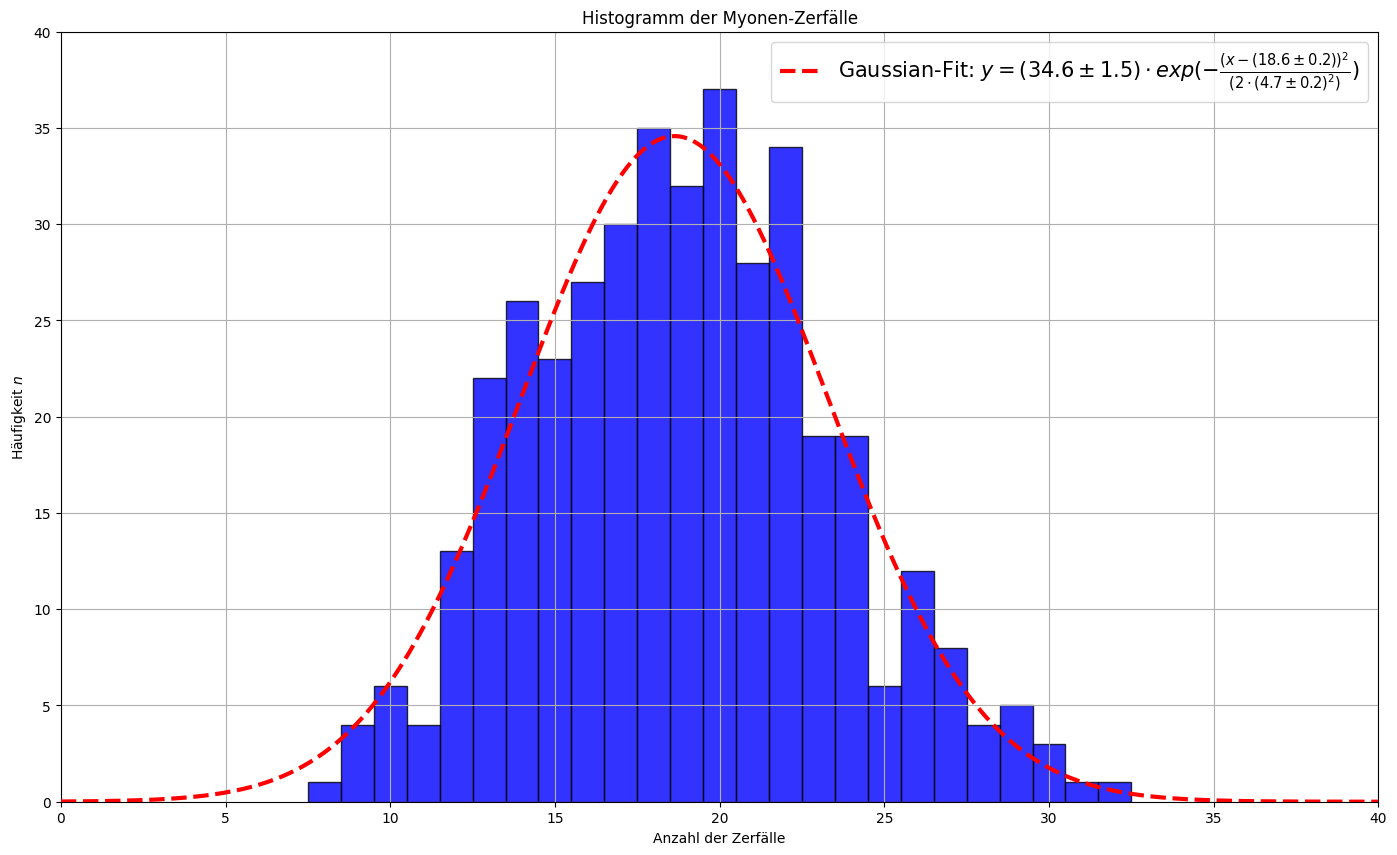

In [ ]:
plt.subplots(1,1,figsize=(17, 10));

bin_width = 1
bins = np.arange(min(numbers_array) - 0.5, max(numbers_array) + 0.5 + bin_width, bin_width)  # Liste von Bin-Grenzen erstellen

hist, bins = np.histogram(numbers_array, bins=bins, density=True)

plt.hist(numbers_array, bins=bins, color='blue', edgecolor='black', alpha=0.8)
plt.xlabel('Anzahl der Zerfälle')
plt.ylabel('Häufigkeit $n$')
plt.title('Histogramm der Myonen-Zerfälle')
plt.grid(True)

pars, stdevs, xfit, yfit = daten_fitten(gaussian, x_array, y_array, 1000, [37, 20, 1], 0, 40)
plt.plot(xfit, yfit, '--', color='red', label = r'Gaussian-Fit: $y = (%.1f \pm %.1f) \cdot exp (- \frac{(x - (%.1f \pm %.1f))^2}{(2 \cdot (%.1f \pm %.1f)^2 )} )$' %(pars[0], stdevs[0], pars[1], stdevs[1], pars[2], stdevs[2]), zorder= 6, linewidth=3)

plt.axis([0, 40, 0, 40]) #Achsenanpassung
plt.legend(fontsize=15)
plt.show()


In [ ]:
a2 = ufloat(pars[0], stdevs[0])
b2 = ufloat(pars[1], stdevs[1])
c2 = ufloat(pars[2], stdevs[2])

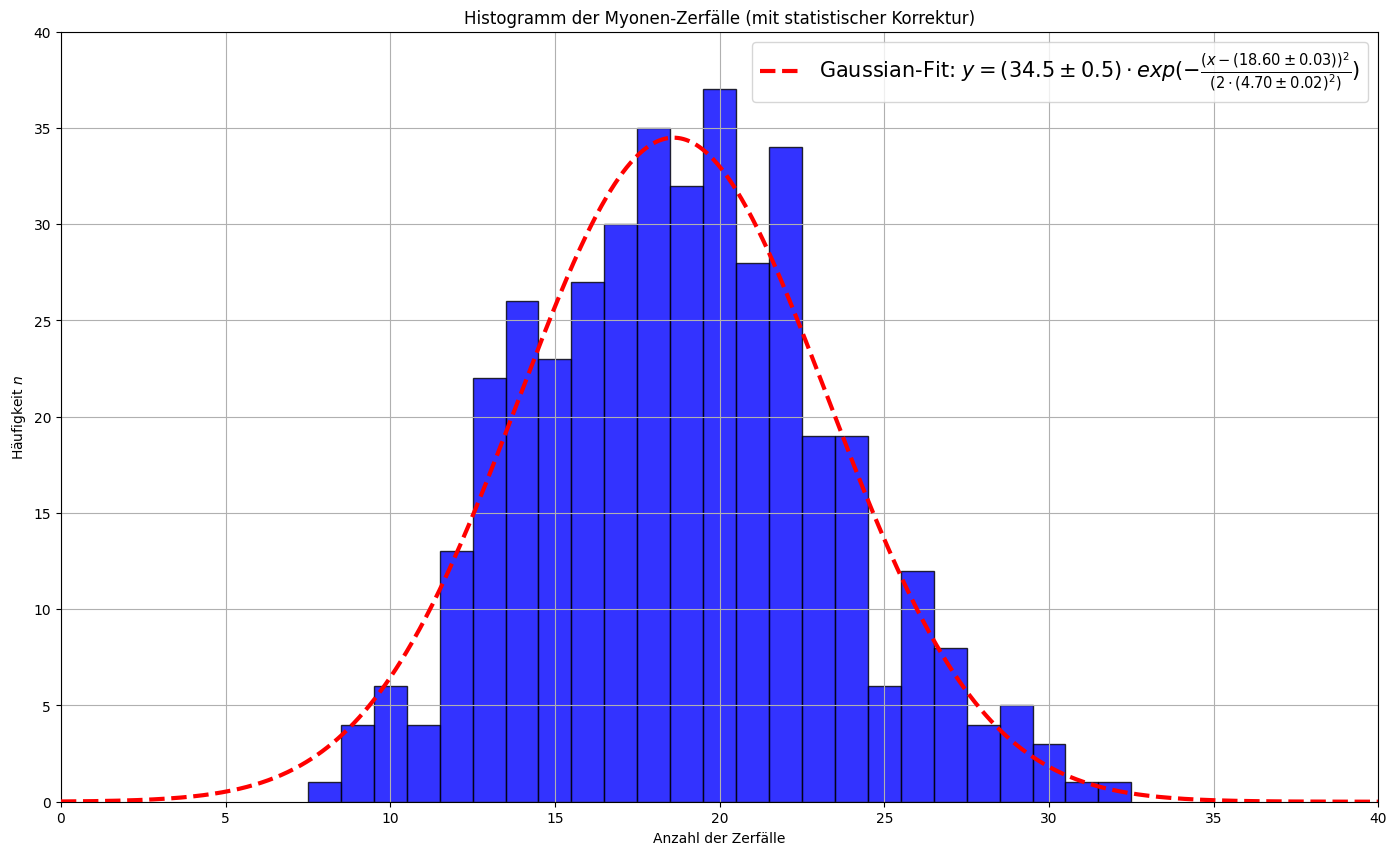

In [ ]:
plt.subplots(1,1,figsize=(17, 10));

bin_width = 1
bins = np.arange(min(numbers_array) - 0.5, max(numbers_array) + 0.5 + bin_width, bin_width)  # Liste von Bin-Grenzen erstellen

hist, bins = np.histogram(numbers_array, bins=bins, density=True)

plt.hist(numbers_array, bins=bins, color='blue', edgecolor='black', alpha=0.8)
plt.xlabel('Anzahl der Zerfälle')
plt.ylabel('Häufigkeit $n$')
plt.title('Histogramm der Myonen-Zerfälle (mit statistischer Korrektur)')
plt.grid(True)

x_array = np.array(x_array)
noise_sigma = x_array/len(x_array)

pars, stdevs = curve_fit(gaussian, x_array, y_array, [37, 20, 1], sigma=1/noise_sigma**2, absolute_sigma=True)
xfit = np.linspace(0, 40, 1000)
yfit = gaussian(xfit, *pars)
plt.plot(xfit, yfit, '--', color='red', label = r'Gaussian-Fit: $y = (%.1f \pm %.1f) \cdot exp (- \frac{(x - (%.2f \pm %.2f))^2}{(2 \cdot (%.2f \pm %.2f)^2 )} )$' %(pars[0], stdevs[0][0], pars[1], stdevs[1][1], pars[2], stdevs[2][2]), zorder= 6, linewidth=3)

plt.axis([0, 40, 0, 40]) #Achsenanpassung
plt.legend(fontsize=15)
plt.show()

In [ ]:
def read_numbers_from_file(file_path):
    numbers = []
    with open(file_path, 'r') as file:
        line_number = 0
        for line in file:
            line_number += 1
            if line_number <= 2 or line_number > (count_lines(file_path) - 2):
                continue  # Skip the first line and the last two lines
            # Convert comma to dot for decimal numbers
            line = line.replace(',', '.')
            number = float(line.strip())
            numbers.append(number)
    return numbers

def count_lines(file_path):
    with open(file_path, 'r') as file:
        return sum(1 for _ in file)

file_path = "3Zeitabstand_170mV_GruppeA.txt"  # Replace with your file path
numbers_array = read_numbers_from_file(file_path)
print("Numbers array:", numbers_array)
numbers_array = [x for x in numbers_array if x <= 300]
numbers_array = [x for x in numbers_array if x >= 0.5]
A3_n = len(numbers_array)
A3_time = 299.5
A3_norm_faktor = A3_n/A3_time
print(A3_norm_faktor)


Numbers array: [43.265988, 14.908112, 3.313262, 32.71365, 30.4712, 191.694625, 13.507387, 119.9619, 65.409587, 2.1189, 27.695338, 91.113475, 3.634875, 76.76395, 15.313237, 82.399375, 21.209013, 59.051537, 27.951313, 3.450337, 72.439287, 4.209325, 167.299425, 3.2384, 27.117687, 39.187238, 13.813213, 27.56965, 56.659662, 104.147125, 24.0077, 9.621725, 27.02015, 52.6854, 11.411925, 0.493787, 14.66215, 44.403175, 46.195712, 78.032575, 70.90075, 30.05765, 84.27955, 2.087025, 49.659962, 7.8128, 1.125825, 61.578812, 30.513525, 70.154162, 55.6784, 0.011125, 41.358213, 66.47865, 25.002387, 57.626537, 164.080575, 130.348375, 137.002837, 52.08995, 178.016975, 101.200712, 71.703263, 10.352562, 7.762587, 45.56265, 108.714287, 88.352987, 6.207475, 9.9229, 96.28485, 181.285737, 35.493413, 20.444537, 109.285162, 8.292537, 68.1368, 25.5548, 117.432025, 56.216375, 20.458525, 31.3469, 51.015362, 26.450087, 25.219025, 144.148237, 8.74365, 4.158675, 14.233875, 34.47345, 36.15455, 32.41315, 192.291675, 10.7

In [ ]:
# Definieren Sie den Bereich und die Schrittweite für das neue X-Array
x_array_step = 2
x_array = np.arange(min(numbers_array) - x_array_step , max(numbers_array) + x_array_step, x_array_step)

# Initialisieren Sie das Y-Array mit Nullen
y_array = np.zeros(len(x_array))

# Bestimmen Sie die Indizes der 5er-Range für jede Zahl im ursprünglichen Array
indices = np.digitize(numbers_array, bins=x_array)

# Zählen Sie die Anzahl der Werte im ursprünglichen Array in jeder 5er-Range des X-Arrays
for idx in indices:
    y_array[idx] += 1


Fitparameter
[ 9.25644844e+01 -1.80664122e-02]
zugehörige Uncertainty
[1.49957807e+00 4.02705247e-04]


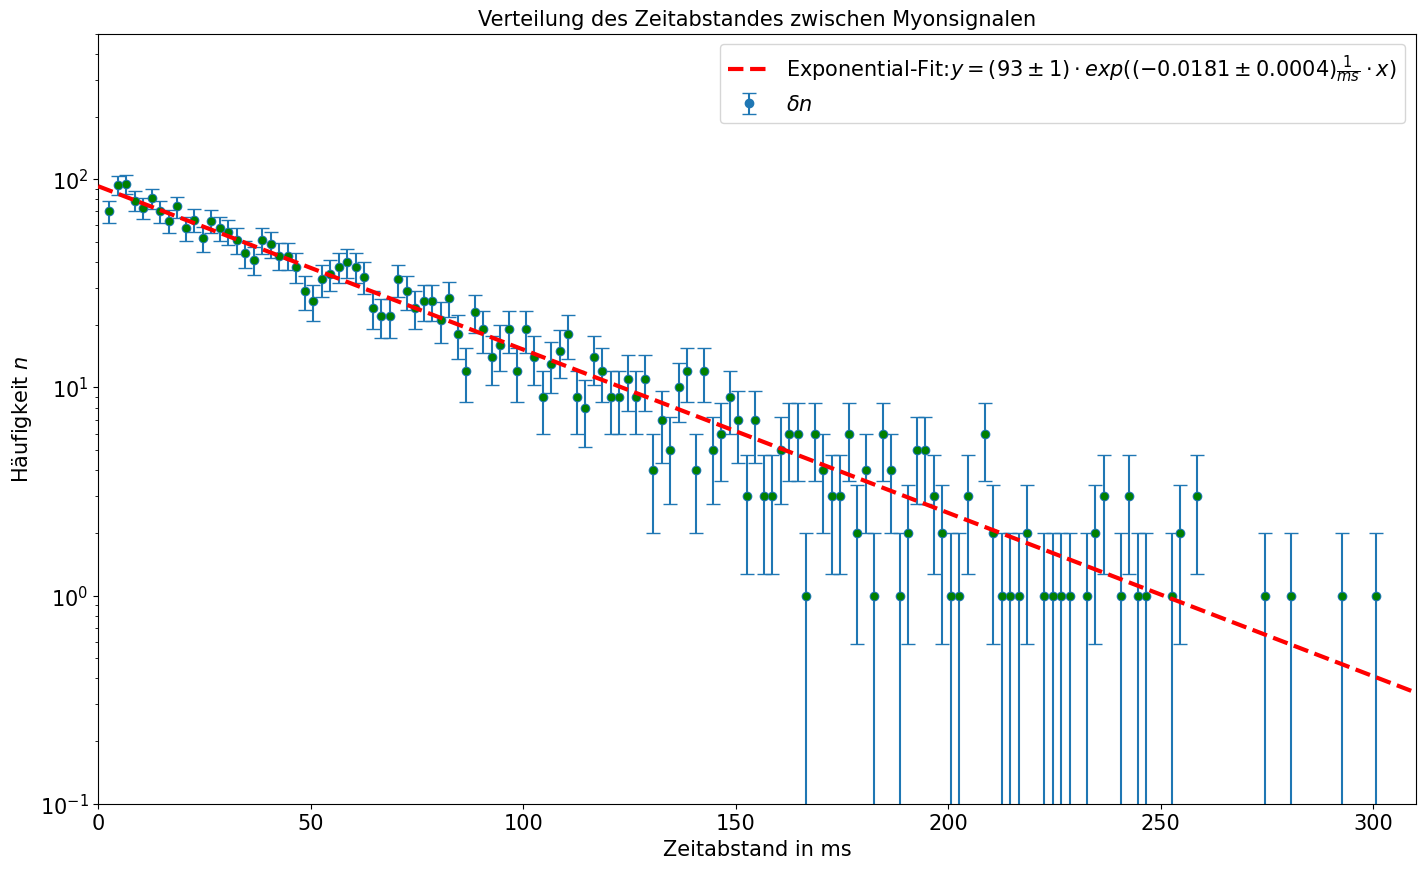

In [ ]:
def exponential(x, a, b):
  return a*np.exp(b*x)

y_array = y_array[2:]
x_array = x_array[2:]
plt.subplots(1,1,figsize=(17, 10));
plt.scatter(x_array, y_array, color='green', s=20, zorder= 5)

y_error = [math.sqrt(i) for i in y_array]
plt.errorbar(x_array, y_array, yerr=y_error, fmt='o', capsize=5, label = r'$δn$')



pars, stdevs, xfit, yfit = daten_fitten(exponential, x_array, y_array, 100, [200, -0.02], 0 ,310)
plt.plot(xfit, yfit, '--', color='red', label = r'Exponential-Fit:$ y = (%.0f \pm %.0f) \cdot exp({(%.4f \pm %.4f) \frac{1}{ms} \cdot x})$'%(pars[0], stdevs[0], pars[1], stdevs[1]), zorder= 6, linewidth=3)

plt.xlabel(r'Zeitabstand in ms', fontsize=15)
plt.ylabel(r'Häufigkeit $n$', fontsize=15)
plt.title('Verteilung des Zeitabstandes zwischen Myonsignalen', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.legend(loc = 'upper right', fontsize=15)
plt.yscale('log')
plt.axis([0, 310, 0.1, 500]) #Achsenanpassung
plt.show()

In [ ]:
mittelwert = np.mean(numbers_array)
standardabweichung = np.std(numbers_array)
print("Mittelwert:", mittelwert)
print("Standardabweichung:", standardabweichung)
print("Min:", min(numbers_array))
print("Max:", max(numbers_array))
a3 = ufloat(pars[0], stdevs[0])
b3 = ufloat(pars[1], stdevs[1])
fit_median = math.log(2)/(-b3)
print("Median des exponentiellen Fits:", fit_median)
einsdurchb = 1/-b3
print("1/b:", einsdurchb)
erg = a3 * A3_time / A3_n

Mittelwert: 53.368464760437774
Standardabweichung: 49.51858228010223
Min: 0.550825
Max: 299.1718
Median des exponentiellen Fits: 38.4+/-0.9
1/b: 55.4+/-1.2


In [ ]:
def read_numbers_from_file(file_path):
    numbers = []
    with open(file_path, 'r') as file:
        line_number = 0
        for line in file:
            line_number += 1
            if line_number <= 1 or line_number > (count_lines(file_path) - 1):
                continue  # Skip the first line and the last two lines
            # Convert comma to dot for decimal numbers
            line = line.replace(',', '.')
            number = float(line.strip())
            numbers.append(number)
    return numbers

def count_lines(file_path):
    with open(file_path, 'r') as file:
        return sum(1 for _ in file)

file_path = "4Lebensdauer_170mV_GruppeC.txt"  # Replace with your file path
numbers_array = read_numbers_from_file(file_path)
print("Numbers array:", numbers_array)
print(len(numbers_array))
numbers_array = [x for x in numbers_array if x <= 0.025]
numbers_array = [x for x in numbers_array if x >= 0.0005]
print(len(numbers_array))
print("Numbers array:", numbers_array)
A4_n = len(numbers_array)
A4_time = 0.0235
A4_norm_faktor = A4_n/A4_time
print(A4_norm_faktor)

Numbers array: [0.001325, 0.00665, 0.006125, 0.001087, 0.0013, 0.001038, 0.0014, 0.007437, 0.001063, 0.003138, 0.004112, 0.001038, 0.000875, 0.024762, 0.003925, 0.02, 0.006662, 0.0054, 0.014825, 0.003537, 0.002437, 0.00435, 0.003938, 0.0026, 0.004825, 0.003138, 0.002762, 0.000975, 0.002012, 0.001187, 0.001025, 0.001375, 0.003487, 0.001988, 0.00105, 0.002175, 0.00375, 0.001712, 0.00115, 0.00115, 0.006737, 0.004675, 0.0025, 0.004488, 0.00135, 0.02485, 0.000887, 0.001238, 0.0037, 0.000962, 0.001975, 0.002625, 0.003775, 0.023025, 0.002837, 0.00355, 0.009388, 0.001962, 0.001275, 0.001988, 0.007275, 0.006475, 0.0099, 0.003587, 0.002113, 0.006137, 0.0059, 0.0009, 0.000987, 0.0009, 0.0118, 0.003987, 0.000837, 0.001612, 0.001137, 0.001038, 0.00155, 0.024, 0.003737, 0.00505, 0.003437, 0.0014, 0.017362, 0.002537, 0.001675, 0.002138, 0.0026, 0.01725, 0.009262, 0.001575, 0.00265, 0.003687, 0.002675, 0.00435, 0.001238, 0.004025, 0.004137, 0.000837, 0.005437, 0.005, 0.00505, 0.003938, 0.002213, 0.005

In [ ]:
# Definieren Sie den Bereich und die Schrittweite für das neue X-Array
x_array_step = 0.00025
x_array = np.arange(0, max(numbers_array) + x_array_step, x_array_step)

# Initialisieren Sie das Y-Array mit Nullen
y_array = np.zeros(len(x_array))

# Bestimmen Sie die Indizes der 5er-Range für jede Zahl im ursprünglichen Array
indices = np.digitize(numbers_array, bins=x_array)

# Zählen Sie die Anzahl der Werte im ursprünglichen Array in jeder 5er-Range des X-Arrays
for idx in indices:
    y_array[idx] += 1

indices = y_array != 0

# Filter x_array and y_array based on the indices
x_array = x_array[indices]
y_array = y_array[indices]
x_array = x_array * 1000

Fitparameter
[ 1.35233763e+03 -4.64599022e-01  2.18743019e+01]
zugehörige Uncertainty
[4.13829637e+01 9.75273106e-03 1.26476123e+00]
Reduced Chi-Square: 1.2889232802009831


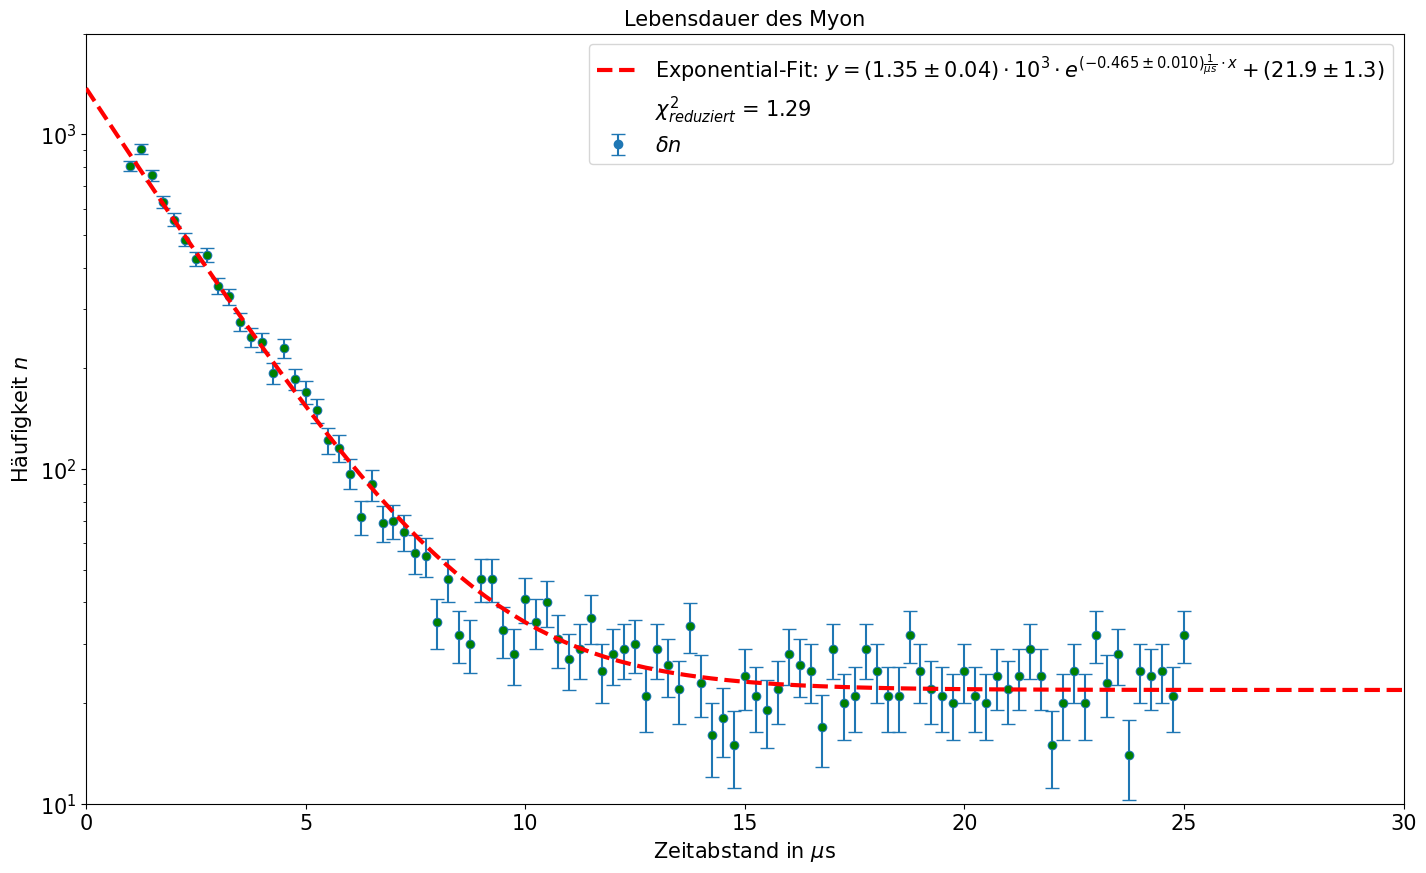

In [ ]:
# Definiere deine Funktion mit Unsicherheiten in den Parametern
def exponential(x, a, b, c):
  return a*np.exp(b*x) + c

def uexponential(x, a, b):
    return a * unp.exp(b * x)


a_nominal = pars[0]
a_uncertainty = stdevs[0]
b_nominal = pars[1]
b_uncertainty = stdevs[1]

# Erstelle ufloat-Objekte für die Parameter mit Unsicherheiten
a_with_uncertainty = ufloat(a_nominal, a_uncertainty)
b_with_uncertainty = ufloat(b_nominal, b_uncertainty)

# Berechne die Werte, die von y subtrahiert werden sollen, mit Unsicherheiten in den Parametern
#subtract_values = uexponential(x_array, a_with_uncertainty, b_with_uncertainty)

# Subtrahiere die berechneten Werte von y
y_with_uncertainties = np.array([ufloat(y, math.sqrt(y)) for y in y_array])  # Wir nehmen an, dass y keine Unsicherheit hat
#y_modified = y_with_uncertainties - (subtract_values/2000000)*(A4_norm_faktor/A3_norm_faktor)
y_modified = y_with_uncertainties


plt.subplots(1,1,figsize=(17, 10));
plt.scatter(x_array, [i.nominal_value for i in y_modified], color='green', s=20, zorder= 5)

y_error = [math.sqrt(i.nominal_value) for i in y_modified]

plt.errorbar(x_array, [i.nominal_value for i in y_modified], yerr=y_error, fmt='o', capsize=5, label = r'$δn$')



y_modified_values = [i.nominal_value for i in y_modified]
y_modified_values = np.array(y_modified_values)

#filter
indices = np.where(x_array > 2)
x_array = x_array[indices]
y_modified_values = y_modified_values[indices]
y_error = np.array(y_error)
y_error = y_error[indices]

pars, stdevs, xfit, yfit = daten_fitten(exponential, x_array, y_modified_values, 100, [500, -0.4, 30], 0, 30)

residuals = y_modified_values - exponential(x_array, *pars)
chi_square = np.sum((residuals / y_error) ** 2)

# Degrees of freedom
nu = len(x_array) - len(pars)

# Reduced chi-square
reduced_chi_square = chi_square / nu
print("Reduced Chi-Square:", reduced_chi_square)

plt.plot(xfit, yfit, '--', color='red', label = r'Exponential-Fit: $ y = (%.2f \pm %.2f) \cdot 10^3 \cdot e^{(%.3f \pm %.3f) \frac{1}{\mu s} \cdot x} + (%.1f \pm %.1f)$'% (pars[0]/1000, stdevs[0]/1000, pars[1], stdevs[1], pars[2], stdevs[2]), zorder= 6, linewidth=3)
plt.plot([], [], ' ', label = r'$\chi_{reduziert}^2$ = %.2f' % (reduced_chi_square))

plt.xlabel(r'Zeitabstand in $\mu$s', fontsize=15)
plt.ylabel(r'Häufigkeit $n$', fontsize=15)
plt.title('Lebensdauer des Myon', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.legend(loc = 'upper right', fontsize=15)
plt.yscale('log')
plt.axis([0, 30, 10, 2000]) #Achsenanpassung
plt.show()

In [ ]:
a4 = ufloat(pars[0], stdevs[0])
b4 = ufloat(pars[1], stdevs[1])
c4 = ufloat(pars[2], stdevs[2])
lebensdauer = 1/-b4
print(lebensdauer)

2.15+/-0.05


In [ ]:
N = ufloat(11, math.sqrt(11))
r = ufloat(0.5, 0.01)
d = ufloat(0.075, 0.001)

F = N/(0.1*2*math.pi*(math.pi * r**2 * 0.25 + 2*r*d* 1/32 * 2*math.pi))
print(F)

83+/-25


In [ ]:
F = b2/(2*math.pi*(math.pi * r**2 * 0.25 + 2*r*d* 1/32 * 2*math.pi))
print(F)

14.0+/-0.6


In [ ]:
abstand = ufloat(1, 0.01)
Winkel = unp.arctan(r/(abstand))
print(Winkel)

0.464+/-0.009


In [ ]:
F = N/(2*math.pi*(-0.25 * (unp.cos(Winkel)-1)*math.pi * r**2 + 2*r*d*(1/32 * (4* Winkel - unp.sin(Winkel)))))
print(F)

73+/-23


In [ ]:
N1 = ufloat(16.5, math.sqrt(16.5))
N2 = ufloat(15, math.sqrt(15))
Nges= 0.5*(N1+N2)
print(Nges)

15.8+/-2.8


In [ ]:
omega_plt = -2*math.pi * (unp.cos(Winkel)-1)
print("omega_plt:", omega_plt)

P_omega = omega_plt/(2*math.pi)
print("P_omega:", P_omega)

P_my = 1 - unp.cos(Winkel) ** 3
print("Polarisation P_my:", P_my)

omega_plt: 0.663+/-0.025
P_omega: 0.106+/-0.004
Polarisation P_my: 0.284+/-0.010


In [ ]:
erg = len(x_array)*c4
print(erg)
myonenZerfallabsolut = len(numbers_array)-erg
print('absolute Anzahl von zerfallenen Myonen:', myonenZerfallabsolut)
relativerFehler=lebensdauer/unp.sqrt(myonenZerfallabsolut)
print('relativer Fehler:', relativerFehler)

(2.01+/-0.12)e+03
absolute Anzahl von zerfallenen Myonen: (7.99+/-0.12)e+03
relativer Fehler: 0.0241+/-0.0005


In [ ]:
t=ufloat(0.7,0.1)
P= a4* unp.exp(b4*t)/(a4* unp.exp(b4*t)+c4)
print(P)

0.9781+/-0.0017


In [ ]:
def uexponential(x, a, b, c):
    return a * unp.exp(b * x) +c
# Beispiel Y-Werte der gefitteten Exponentialfunktion (ersetze dies durch deine eigenen Daten)
x_values = np.arange(0, 25, 0.25)
y_values = uexponential(x_values, a4, b4, c4)
# Binbreite
bin_width = 0.00025

# Numerische Integration
integral = np.sum(y_values)

print("Numerisches Integral über den gesamten Bereich:", integral)

Numerisches Integral über den gesamten Bereich: (1.45+/-0.05)e+04
